## Limpieza del dataset

### Cargue de librerías

In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
pd.options.display.float_format = '{:.6f}'.format

### Lectura del dataset de Properatti

In [245]:
data = pd.read_csv('properatti.csv')

In [246]:
# Listado de columnas o variables disponibles

data.columns

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail'],
      dtype='object')

In [247]:
# Visualización de los primeros dos registros del dataset de properatti

data.head(2)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.000000,"-34.6618237,-58.5088387",-34.661824,...,40.000000,1127.272727,1550.000000,nan,nan,nan,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.000000,"-34.9038831,-57.9643295",-34.903883,...,nan,nan,nan,nan,nan,nan,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...


### Eliminación de columnas que no usaremos, registros duplicados y cálculo de valores nulos.

#### Eliminación de las columnas 'Unnamed: 0', 'properati_url' e 'image_thumbnail'

In [248]:
# Tras una inspección visual de las primeras filas del dataset decidimos sacar tres columnas del dataset las cuales no tendremos en cuenta
# para futuros análisis

data.drop(columns={'Unnamed: 0','properati_url','image_thumbnail'}, inplace=True)

In [249]:
# Revisión del tipo de dato de cada variable

data.dtypes

operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                         float64
rooms                         float64
expenses                      float64
description                    object
title                          object
dtype: object

In [250]:
# Hallamos algunas estadísticas de las variables continuas del dataset

data.describe()

,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
count,102503.000000,69670.000000,69670.000000,100810.000000,100810.000000,100810.000000,81892.000000,101313.000000,68617.000000,87658.000000,7899.000000,47390.000000,14262.000000
mean,3574442.317893,-34.626210,-59.266290,468525.925444,4229396.828743,239700.576928,233.795328,133.050181,2160.086916,6912.215705,17.452336,3.080840,5009.234469
std,354130.624157,1.980936,2.299922,2260100.589128,6904714.125574,391323.875732,1782.222147,724.351479,2759.288621,28378.644734,120.243621,1.860773,120440.255650
min,3427208.000000,-54.823985,-75.678931,0.000000,0.000000,0.000000,0.000000,0.000000,0.600000,1.510204,1.000000,1.000000,1.000000
25%,3430234.000000,-34.669065,-58.727040,110000.000000,1583309.440000,89733.880000,50.000000,45.000000,1218.181818,1550.000000,1.000000,2.000000,1000.000000
50%,3433910.000000,-34.597985,-58.480128,185000.000000,2558452.500000,145000.000000,84.000000,75.000000,1800.000000,2213.114754,3.000000,3.000000,2000.000000
75%,3836668.000000,-34.441299,-58.395908,420000.000000,4675792.500000,265000.000000,200.000000,150.000000,2486.411765,3355.548611,6.000000,4.000000,4000.000000
max,6948895.000000,4.545843,-53.733330,650000000.000000,821271104.300000,46545445.000000,200000.000000,187000.000000,206333.333333,3999999.960000,3150.000000,32.000000,10001500.000000


#### Eliminación de registros duplicados

In [251]:
# Eliminación de registros duplicados en caso de que existan

data.drop_duplicates(inplace=True)

# Revisamos el tamaño del dataset después de eliminar los registros duplicados

data.shape

(116140, 23)

Podemos observar que habían 5080 registros duplicados, ya que la cantidad de filas del dataset original es 121220 y la cantidad de filas eliminando duplicados es 116140.

#### Valores nulos por cada variable del dataset

In [252]:
# Chequeamos la cantidad de valores nulos para cada variable del dataset

val_nulos_inicial = pd.DataFrame(data.isnull().sum(), columns=['cant_nulos'])

val_nulos_inicial['porcentaje_nulos'] = val_nulos_inicial['cant_nulos']/data.shape[0]
val_nulos_inicial

,cant_nulos,porcentaje_nulos
operation,0,0.000000
property_type,0,0.000000
place_name,23,0.000198
place_with_parent_names,0,0.000000
country_name,0,0.000000
state_name,0,0.000000
geonames_id,18180,0.156535
lat-lon,48289,0.415783
lat,48289,0.415783
lon,48289,0.415783


Observamos que columnas como 'floor', 'rooms' y 'expenses' son las columnas que mayor cantidad de valores nulos tienen, con porcentajes que van desde el 60% al 94%.

### Imputación de valores nulos en variables de interés en el dataset

#### Variable place_name

In [253]:
# Cantidad de valores nulos

data['place_name'].isnull().sum()

23

In [254]:
# Imputamos valores nulos apoyándonos en la columna 'place_with_parent_names'

filtro = data['place_name'].isnull()
data.loc[filtro,'place_name'] = data.loc[filtro, 'place_with_parent_names'].apply(lambda x: x.split('|')[3])

In [255]:
# Verificamos la cantidad de valores nulos después de realizar la imputación

data['place_name'].isnull().sum()

0

#### Variable geonames_id

In [256]:
# Cantidad de valores nulos

data['geonames_id'].isnull().sum()

18180

In [257]:
# Exploramos el conteo de registros por cada combinación 'geonames_id' con 'place_name'

analisis_geonames_id = data.groupby(['geonames_id','place_name']).agg({'operation':['count']}).sort_values(('geonames_id'))
analisis_geonames_id.columns = analisis_geonames_id.columns.droplevel(level=0)
analisis_geonames_id.reset_index(col_level=1, inplace=True)
analisis_geonames_id

,geonames_id,place_name,count
0,3427208.000000,Zelaya,7
1,3427212.000000,Zárate,8
2,3427326.000000,Wilde,139
3,3427354.000000,Virreyes,39
4,3427366.000000,Villa Soldati,15
...,...,...,...
649,6693230.000000,Villa Santa Rita,57
650,6942538.000000,Costa del Este,16
651,6942539.000000,Aguas Verdes,15
652,6942842.000000,Bella Italia,2


Se presentan repeticiones para cada combinación, un indicio de la relación entre 'place_name' y 'geonames_id'

In [258]:
# Exploramos geonames_id repetidos con diferente place_name

geonames_id_dupli = analisis_geonames_id.loc[analisis_geonames_id['geonames_id'].duplicated(), 'geonames_id']
analisis_geonames_id.loc[analisis_geonames_id['geonames_id'].isin(geonames_id_dupli)]

,geonames_id,place_name,count
59,3428927.000000,San José,10
60,3428927.000000,San Jose,5
109,3430234.000000,Palermo Soho,383
110,3430234.000000,Palermo,2741
180,3433359.000000,Ituzaingó,818
181,3433359.000000,Villa Udaondo,25
247,3435548.000000,Centro,229
248,3435548.000000,Centro / Microcentro,221
263,3435907.000000,Buenos Aires Interior,106
264,3435907.000000,Buenos Aires Costa Atlántica,27


In [259]:
# Unificamos valores de place_name que están escritos de formas diferentes, por tildes o formas diferentes de indicar el mismo lugar

data.loc[:,'place_name'] = data.loc[:,'place_name'].replace({'San José':'San Jose',
                                                            'Palermo Soho':'Palermo',
                                                            'Villa Udaondo':'Ituzaingó',
                                                            'Centro/Microcentro':'Centro'
                                                            }) 

In [260]:
# Ahora nos apoyamos en la columna 'place_with_parent_names' para corregir 'place_name' y volver a mapear el valor de geonames_id 
# correspondiente

filtro = data['geonames_id'].isnull()
data.loc[filtro, 'place_name'] = data.loc[filtro, 'place_with_parent_names'].apply(lambda x: x.split('|')[3])

In [261]:
# Creamos una tabla en la que para cada place_name tengamos un único valor de geonames_id

place_name_geonames_id = data.groupby('place_name').agg({'geonames_id':['max']}).reset_index()
place_name_geonames_id.columns = place_name_geonames_id.columns.droplevel(level=1)
place_name_geonames_id.rename(columns={'geonames_id':'geonames_id_2'}, inplace=True)
place_name_geonames_id.head()

,place_name,geonames_id_2
0,,nan
1,Abasto,3436521.000000
2,Acassuso,3436508.000000
3,Achiras,3866959.000000
4,Adolfo Alsina,3866926.000000


In [262]:
# Ya que hemos corregido los valores de place_name en los registros donde geonames_id tiene valores nulos, haremos un merge con la
# tabla creada en el paso anterior, generando una columna nueva de geoname_id, la cual nos servirá para imputar los valores nulos

# Realizamos el merge con la tabla que tiene una combinación única de place_name, geonames_id
data=data.merge(place_name_geonames_id, on='place_name', how='left')
filtro = data['geonames_id'].isnull()
# Imputamos valores nulos
data.loc[filtro,'geonames_id'] = data.loc[filtro,'geonames_id_2']

In [263]:
# Eliminamos la columna geonames_id_2
data.drop('geonames_id_2', inplace=True, axis=1)

In [264]:
# Verificamos la cantidad final de valores nulos en la columna geonames_id
data.loc[:,'geonames_id'].isnull().sum()

1910

#### Variables lat-lon, lat, lon

In [265]:
# Cantidad de valores nulos

data.loc[:, ['lat-lon', 'lat', 'lon']].isnull().sum()

lat-lon    48289
lat        48289
lon        48289
dtype: int64

In [266]:
# Verificamos la consistencia entre los valores la columna lat-lon y lat, lon por separado.

# Al hacer un split(',') sobre la columna 'lat-lon' podemos comparar lo obtenido con las columnas 'lat' y 'lon' por separado verificando
# consistencia en la data. Aquí damos una tolerancia de +/-0.000001 por redondeos
test=data.loc[data['lat-lon'].notnull()]
prop_lat_consistente = ((test['lat-lon'].apply(lambda x: float(str(x).split(',')[0]))-0.000001<=test['lat']) &
       (test['lat']<=test['lat-lon'].apply(lambda x: float(str(x).split(',')[0]))+0.000001)).mean()
prop_lon_consistente = ((test['lat-lon'].apply(lambda x: float(str(x).split(',')[1]))-0.000001<=test['lon']) &
       (test['lon']<=test['lat-lon'].apply(lambda x: float(str(x).split(',')[1]))+0.000001)).mean()

print(f'La proporción de data consistente en la columna lat y lon es {prop_lat_consistente} y {prop_lon_consistente} respectivamente')

La proporción de data consistente en la columna lat y lon es 1.0 y 1.0 respectivamente


Podemos estar seguros que la información para aquellos registros donde tenemos valores no nulos es consistente

* Realizaremos una búsqueda de información relativa a la latitud y la longitud en la columna 'description'

In [267]:
# Explorar la columna 'description' es busca de 'lat'

import re
coincidencias = data['description'].apply(lambda x: re.search('^lat',str(x)))

In [268]:
# Verificamos la proporción de registros en los que hay palabras que comiencen por 'lat'

(coincidencias.values!=None).mean()

0.0

In [269]:
# Explorar la columna 'description' es busca de 'lon'

import re
coincidencias = data['description'].apply(lambda x: re.search('^lon',str(x)))

In [270]:
# Verificamos la proporción de registros en los que hay palabras que comiencen por 'lon'

(coincidencias.values!=None).mean()

0.0

**Conclusiones columnas lat-lot, lat y lot**

* La columna description no es útil para realizar imputación de datos relativa a latitud y longitud
* No realizaremos imputación de estos datos a partir del promedio de coordenadas agrupando por las columnas place_name o geonames_id ya que creemos que la combinación del poder predictivo al focalizar primero un place_name y de forma más detallada las coordenadas de un inmueble es muy valiosa y no vale la pena un método de imputación con bajo estas condiciones.

#### Variables surface_total_in_m2 / surface_covered_in_m2

In [271]:
# Cantidad de valores nulos 

data.loc[:,['surface_total_in_m2', 'surface_covered_in_m2']].isnull().sum()

surface_total_in_m2      38378
surface_covered_in_m2    18853
dtype: int64

In [272]:
# Creamos una tabla auxiliar para calcular los ratios entre las columnas de superficies total y cubierta

analisis_surface_total = data.loc[data['surface_total_in_m2'].notnull()&
                                data['surface_covered_in_m2'].notnull()&
                                data['surface_covered_in_m2']>0,
                               ['property_type', 'surface_total_in_m2', 'surface_covered_in_m2']]
analisis_surface_total.shape

(70899, 3)

In [273]:
# Hallamos un factor de área que se obtiene al dividir superficie total en superficie cubierta

analisis_surface_total['ratio_surface_total_covered'] = analisis_surface_total['surface_total_in_m2']/\
analisis_surface_total['surface_covered_in_m2']

In [274]:
# Vamos a calcular el rango intercualtil, eliminar valores extremos y calcular el factor multiplicador de 'surface_covered_in_m2'
# para calcular 'surface_total_in_m2'

analisis_surface_total['percentil25']=analisis_surface_total.groupby('property_type')['ratio_surface_total_covered'].\
transform(np.percentile,25)
analisis_surface_total['percentil75']=analisis_surface_total.groupby('property_type')['ratio_surface_total_covered'].\
transform(np.percentile,75)
analisis_surface_total['rango_intercuartil'] = analisis_surface_total['percentil75'] - analisis_surface_total['percentil25']
analisis_surface_total['ratio_surface_total_covered'] = np.where((analisis_surface_total['ratio_surface_total_covered']>=
                                                                analisis_surface_total['percentil25']-
                                                                  1.5*analisis_surface_total['rango_intercuartil'])
                                                                 &
                                                                 (analisis_surface_total['ratio_surface_total_covered']<=
                                                                analisis_surface_total['percentil75']+
                                                                  1.5*analisis_surface_total['rango_intercuartil']
                                                                 ),
                                                                 analisis_surface_total['ratio_surface_total_covered'],
                                                                 -1
                                                                )
analisis_surface_total = analisis_surface_total.loc[analisis_surface_total['ratio_surface_total_covered']>0]
analisis_surface_total.shape

(64602, 7)

In [275]:
# Generamos la tabla con el ratio entre 'surface_total_in_m2' / 'surface_covered_in_m2'

resumen_analisis_surface_total = analisis_surface_total.loc[:,['property_type','ratio_surface_total_covered']].groupby('property_type').\
describe().reset_index()
resumen_analisis_surface_total.columns = resumen_analisis_surface_total.columns.droplevel(level=0)
resumen_analisis_surface_total.rename(columns={'':'property_type','mean':'factor_surf'}, inplace=True)
resumen_analisis_surface_total=resumen_analisis_surface_total.loc[:,['property_type', 'factor_surf']]
resumen_analisis_surface_total

,property_type,factor_surf
0,PH,1.232484
1,apartment,1.097483
2,house,1.622468
3,store,1.000000


In [276]:
# Realizamos un merge usando como key el tipo de propiedad y adicionamos la columna con el ratio de superficies a la data

data = data.merge(resumen_analisis_surface_total, on='property_type', how='left')

In [277]:
# Imputando valores de la columna 'surface_total_in_m2'

filtro_surface_total = data['surface_total_in_m2'].isnull()&data['surface_covered_in_m2'].notnull()
data.loc[filtro_surface_total,'surface_total_in_m2'] = data['surface_covered_in_m2']*data['factor_surf']

# Imputando valores de la columna 'surface_covered_in_m2'

filtro_surface_covered = data['surface_covered_in_m2'].isnull()&data['surface_total_in_m2'].notnull()
data.loc[filtro_surface_covered,'surface_covered_in_m2'] = data['surface_total_in_m2']/data['factor_surf']
data.drop(columns=['factor_surf'], inplace=True)

In [278]:
# Cantidad de valores nulos después de imputación

data.loc[:,['surface_total_in_m2', 'surface_covered_in_m2']].isnull().sum()

surface_total_in_m2      11992
surface_covered_in_m2    11992
dtype: int64

#### Variable price_aprox_usd

In [279]:
# Cantidad de valores nulos 

data.loc[:,['price_aprox_usd']].isnull().sum()

price_aprox_usd    17556
dtype: int64

In [280]:
# Realizamos un analisis de la TC (tasa de cambio)

data['tc']=data['price_aprox_local_currency']/data['price_aprox_usd']
data['tc'].describe()

count   98583.000000
mean       17.644500
std         0.000000
min        17.644498
25%        17.644500
50%        17.644500
75%        17.644500
max        17.644500
Name: tc, dtype: float64

In [281]:
# Vamos a explorar la posibilidad de apoyarnos en la columna price_aprox_local_currency con la tasa de cambio calculada

((data['price_aprox_usd'].isnull())&(data['price_aprox_local_currency'].notnull())).sum()

0

A pesar de que prácticamente para todos los registros del dataset obtenemos una tasa de cambio de 17.6445, la cual se considera contundente, en todos los casos en los que price_aprox_usd es nulo, price_aprox_local_currency también es nulo.

In [282]:
# Cantidad de valores nulos después de imputación

data.drop(columns=['tc'], inplace=True)
data.loc[:,['price_aprox_usd']].isnull().sum()

price_aprox_usd    17556
dtype: int64

### Definición de la Variable Target

Definimos como variable objetivo **'price_usd_per_m2'**, variable sobre la cual no realizaremos imputación de valores nulos. Elegimos esta variable ya que es comparable entre diferentes zonas y tipos de propiedad.

**Nota:**
No descartamos la posibilidad de modelar con la variable **price_aprox_usd** como target dado que finalmente no tuvo imputación de valores y cuenta con una menor cantidad de valores nulos que **'price_usd_per_m2'**

#### El proceso de imputación de valores a partir de regex en la columna 'description' se realizará en otro notebook.

### Valores nulos al final de la imputación

In [289]:
val_nulos_final = pd.DataFrame(data.isnull().sum(), columns=['cant_nulos'])

val_nulos_final['porcentaje_nulos'] = val_nulos_inicial['cant_nulos']/data.shape[0]
val_nulos_final

,cant_nulos,porcentaje_nulos
operation,0,0.000000
property_type,0,0.000000
place_name,0,0.000198
place_with_parent_names,0,0.000000
country_name,0,0.000000
state_name,0,0.000000
geonames_id,1910,0.156535
lat-lon,48289,0.415783
lat,48289,0.415783
lon,48289,0.415783


### Comparativa de valores nulos del dataset original vs. dataset con valores imputados

In [290]:
val_nulos_comparacion = val_nulos_inicial.merge(val_nulos_final, how='left', 
                                                left_index=True, right_index=True, 
                                                suffixes=('_inicial', '_final'))
val_nulos_comparacion['cant_recuperados'] = val_nulos_comparacion['cant_nulos_inicial'] - val_nulos_comparacion['cant_nulos_final']
val_nulos_comparacion

,cant_nulos_inicial,porcentaje_nulos_inicial,cant_nulos_final,porcentaje_nulos_final,cant_recuperados
operation,0,0.000000,0,0.000000,0
property_type,0,0.000000,0,0.000000,0
place_name,23,0.000198,0,0.000198,23
place_with_parent_names,0,0.000000,0,0.000000,0
country_name,0,0.000000,0,0.000000,0
state_name,0,0.000000,0,0.000000,0
geonames_id,18180,0.156535,1910,0.156535,16270
lat-lon,48289,0.415783,48289,0.415783,0
lat,48289,0.415783,48289,0.415783,0
lon,48289,0.415783,48289,0.415783,0


Tras realizar el proceso de imputación de datos, hemos imputado valores en las columnas 'place_name', 'geonames_id', 'surface_total_in_m2' y 'surface_covered_in_m2', siendo las 3 últimas las más significativas.

### Análisis de valores extremos

In [342]:
#respaldo_data = data.copy()

In [815]:
#data = respaldo_data.copy()
#data.shape

In [816]:
# Seteamos un formato de impresión para que se muestren 3 cifras decimales.

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [817]:
# Creamos una función para asignar el valor de -1 para aquellos valores considerados extremos, menores a p25 - 1.5 rango intercuartil 
# y mayores a p75 + 1.5 rango intercuartil

def marca_valores_extremos(data, columna, filtro):
    data_arreglo = data.copy()
    data_arreglo.loc[filtro&
             ((data_arreglo[columna]<(data_arreglo['25%']-1.5*data_arreglo['rango_intercuartil']))|
              (data_arreglo[columna]>(data_arreglo['75%']+1.5*data_arreglo['rango_intercuartil'])))&
             data_arreglo['rango_intercuartil']>0.1,'auxiliar'] = True
    
    data_arreglo = data_arreglo.loc[:, 'auxiliar'].values
    
    return data_arreglo

#### Valores extremos variable 'price_usd_per_m2'

In [818]:
# Construimos una tabla base para calcular los valores límite de price_usd_per_m2 de acuerdo al property_type y place_name

tabla_base = data.loc[data['price_usd_per_m2'].notnull()&
                                data['property_type'].notnull()&
                                data["place_name"].notnull(),
                               ['property_type','place_name','price_usd_per_m2']]

In [819]:
# Calculamos p25, p75 y rango intercuartil por cada combinación property_type, place_name.

valores_referencia =tabla_base.groupby(['property_type','place_name'])["price_usd_per_m2"].describe().\
reset_index()[['property_type','place_name','25%','75%']]

valores_referencia['rango_intercuartil'] = valores_referencia['75%'] - valores_referencia['25%']

In [820]:
valores_referencia.head(2)

,property_type,place_name,25%,75%,rango_intercuartil
0,PH,Abasto,1000.000,2000.000,1000.000
1,PH,Acassuso,998.412,2800.000,1801.588


In [821]:
# Anadimos las columnas de p25, p75 y rango intercuartil a nuestra data

data = data.merge(valores_referencia,how="left",on=["property_type","place_name"])

In [822]:
# Marcación de valores extremos

filtro = data['price_usd_per_m2'].notnull()

data.loc[:,'valores_extremos'] = marca_valores_extremos(data, 'price_usd_per_m2', filtro)

In [823]:
# Cantidad de valores extremos en la columna price_usd_per_m2

data.loc[data['valores_extremos']==True].shape[0]

2753

In [824]:
# Tamaño del dataset antes de eliminar valores extremos

tamano_inicial = data.shape[0]

In [825]:
# Eliminación de valores extremos

data.drop(data.loc[data['valores_extremos']==True].index, inplace=True)

# Eliminamos las columnas que creamos como auxiliares

data.drop(columns={"25%","75%","rango_intercuartil",'valores_extremos'},inplace=True)

In [826]:
# Tamaño del dataset después de eliminar valores extremos

tamano_final = data.shape[0]

In [827]:
print('Cantidad de registros antes de eliminar valores extremos: ', tamano_inicial,'\n',
      'Cantidad de registros después de eliminar valores extremos: ', tamano_final)

Cantidad de registros antes de eliminar valores extremos:  116140 
 Cantidad de registros después de eliminar valores extremos:  113387


##### Distribución de precio m2 según property_type y place_name después de eliminación de valores extremos.

##### Distribución de precios m2 de apartamentos

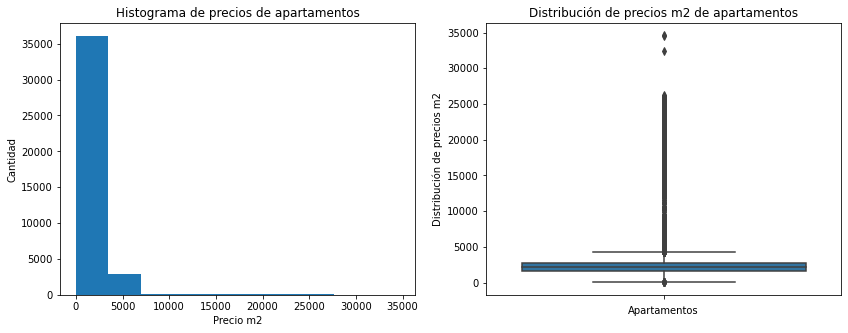

In [828]:
precios = data.loc[data['property_type']=='apartment','price_usd_per_m2']

plt.figure(1, figsize=(14,5))

plt.subplot(1,2,1)
plt.title('Histograma de precios de apartamentos')
plt.hist(precios)
plt.xlabel('Precio m2')
plt.ylabel('Cantidad')

plt.subplot(1,2,2)
plt.title('Distribución de precios m2 de apartamentos')
sns.boxplot(y=precios)
plt.xlabel('Apartamentos')
plt.ylabel('Distribución de precios m2')
plt.show()

##### Distribución de precios m2 de casas

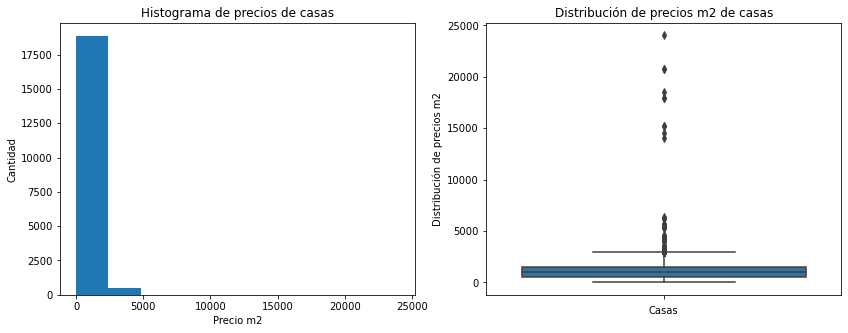

In [829]:
precios = data.loc[data['property_type']=='house','price_usd_per_m2']

plt.figure(1, figsize=(14,5))

plt.subplot(1,2,1)
plt.title('Histograma de precios de casas')
plt.hist(precios)
plt.xlabel('Precio m2')
plt.ylabel('Cantidad')

plt.subplot(1,2,2)
plt.title('Distribución de precios m2 de casas')
sns.boxplot(y=precios)
plt.xlabel('Casas')
plt.ylabel('Distribución de precios m2')
plt.show()

##### Distribución de precios m2 de PH

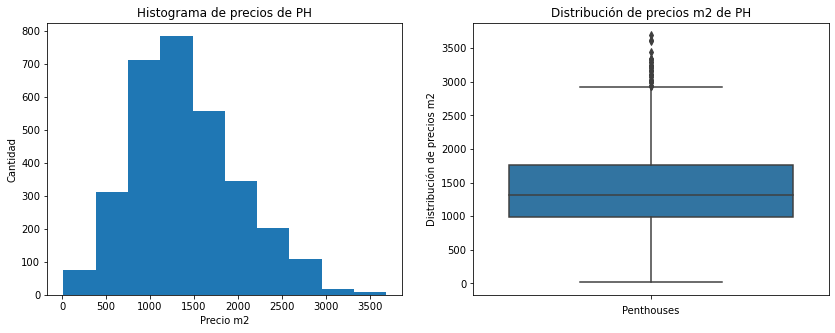

In [830]:
precios = data.loc[data['property_type']=='PH','price_usd_per_m2']

plt.figure(1, figsize=(14,5))

plt.subplot(1,2,1)
plt.title('Histograma de precios de PH')
plt.hist(precios)
plt.xlabel('Precio m2')
plt.ylabel('Cantidad')

plt.subplot(1,2,2)
plt.title('Distribución de precios m2 de PH')
sns.boxplot(y=precios)
plt.xlabel('Penthouses')
plt.ylabel('Distribución de precios m2')
plt.show()

##### Distribución de precios m2 de tiendas

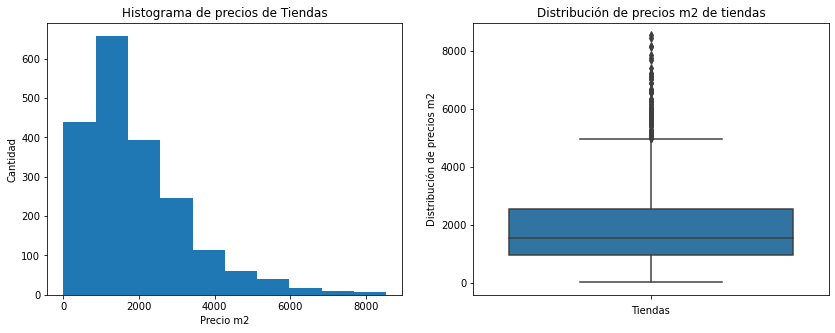

In [831]:
precios = data.loc[data['property_type']=='store','price_usd_per_m2']

plt.figure(1, figsize=(14,5))

plt.subplot(1,2,1)
plt.title('Histograma de precios de Tiendas')
plt.hist(precios)
plt.xlabel('Precio m2')
plt.ylabel('Cantidad')

plt.subplot(1,2,2)
plt.title('Distribución de precios m2 de tiendas')
sns.boxplot(y=precios)
plt.xlabel('Tiendas')
plt.ylabel('Distribución de precios m2')
plt.show()

**Conclusiones imputacion precio m2**: Vemos que la distribución de precio por m2 según el tipo de propiedad tiene una distribución más amigable que la observada en el análisis exploratorio.

#### Valores extremos variable 'surface_total_in_m2'

In [832]:
# Construimos una tabla base para calcular los valores límite de price_usd_per_m2

tabla_base = data.loc[data['surface_total_in_m2'].notnull()&
                                data['property_type'].notnull(),
                               ['property_type','surface_total_in_m2']]

In [833]:
# Calculamos p25, p75 y rango intercuartil por cada combinación property_type, place_name.

valores_referencia =tabla_base.groupby(['property_type'])["surface_total_in_m2"].describe().\
reset_index()[['property_type','25%','75%']]

valores_referencia['rango_intercuartil'] = valores_referencia['75%'] - valores_referencia['25%']

In [834]:
valores_referencia.head(5)

,property_type,25%,75%,rango_intercuartil
0,PH,61.000,138.038,77.038
1,apartment,43.899,85.604,41.704
2,house,180.000,450.000,270.000
3,store,45.000,330.000,285.000


In [835]:
# Anadimos las columnas de p25, p75 y rango intercuartil a nuestra data

data = data.merge(valores_referencia,how="left",on=["property_type"])

In [836]:
# Marcación de valores extremos

filtro = data['surface_total_in_m2'].notnull()

data.loc[:,'valores_extremos'] = marca_valores_extremos(data, 'surface_total_in_m2', filtro)

In [837]:
# Cantidad de valores extremos en la columna price_usd_per_m2

data.loc[data['valores_extremos']==True].shape[0]

7679

In [838]:
# Tamaño del dataset antes de eliminar valores extremos

tamano_inicial = data.shape[0]

In [839]:
# Eliminación de valores extremos

data.drop(data.loc[data['valores_extremos']==True].index, inplace=True)

# Eliminamos las columnas que creamos como auxiliares

data.drop(columns={"25%","75%","rango_intercuartil",'valores_extremos'},inplace=True)

In [840]:
# Tamaño del dataset después de eliminar valores extremos

tamano_final = data.shape[0]

In [841]:
print('Cantidad de registros antes de eliminar valores extremos: ', tamano_inicial,'\n',
      'Cantidad de registros después de eliminar valores extremos: ', tamano_final)

Cantidad de registros antes de eliminar valores extremos:  113387 
 Cantidad de registros después de eliminar valores extremos:  105708


##### Distribución de superficie total m2 según property_type después de eliminación de valores extremos.

##### Distribución de superficie total m2 de apartamentos

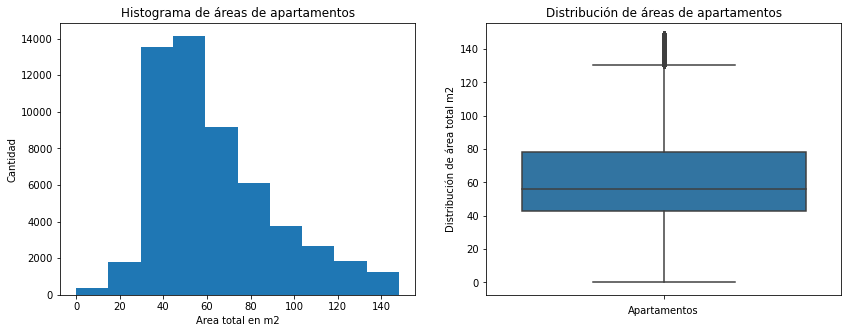

In [842]:
areas_apartamentos = data.loc[data['property_type']=='apartment','surface_total_in_m2']

plt.figure(1, figsize=(14,5))
plt.title('Distribución de áreas totales de apartamentos')

plt.subplot(1,2,1)
plt.title('Histograma de áreas de apartamentos')
plt.hist(areas_apartamentos)
plt.xlabel('Area total en m2')
plt.ylabel('Cantidad')

plt.subplot(1,2,2)
plt.title('Distribución de áreas de apartamentos')
sns.boxplot(y=areas_apartamentos)
plt.xlabel('Apartamentos')
plt.ylabel('Distribución de área total m2')
plt.show()


##### Distribución de superficie total m2 de casas

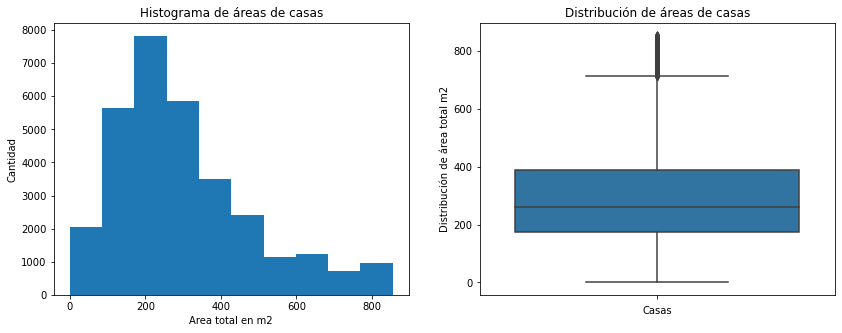

In [843]:
# Distribución de áreas de casas
areas_apartamentos = data.loc[data['property_type']=='house','surface_total_in_m2']


plt.figure(1, figsize=(14,5))
plt.title('Distribución de áreas totales de casas')

plt.subplot(1,2,1)
plt.title('Histograma de áreas de casas')
plt.hist(areas_apartamentos)
plt.xlabel('Area total en m2')
plt.ylabel('Cantidad')

plt.subplot(1,2,2)
plt.title('Distribución de áreas de casas')
sns.boxplot(y=areas_apartamentos)
plt.xlabel('Casas')
plt.ylabel('Distribución de área total m2')
plt.show()

##### Distribución de superficie total m2 de PH

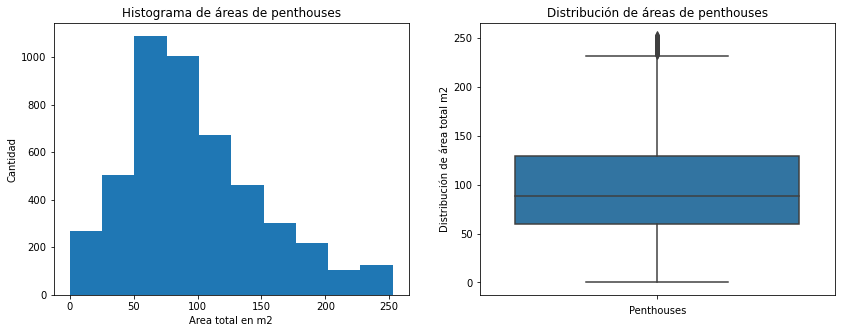

In [844]:
# Distribución de áreas de penthouses
areas_apartamentos = data.loc[data['property_type']=='PH','surface_total_in_m2']


plt.figure(1, figsize=(14,5))
plt.title('Distribución de áreas totales de penthouses')

plt.subplot(1,2,1)
plt.title('Histograma de áreas de penthouses')
plt.hist(areas_apartamentos)
plt.xlabel('Area total en m2')
plt.ylabel('Cantidad')

plt.subplot(1,2,2)
plt.title('Distribución de áreas de penthouses')
sns.boxplot(y=areas_apartamentos)
plt.xlabel('Penthouses')
plt.ylabel('Distribución de área total m2')
plt.show()


##### Distribución de superficie total m2 de tiendas

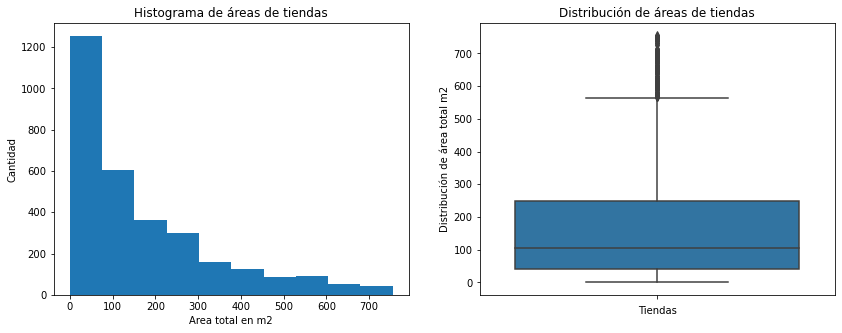

In [845]:
# Distribución de áreas de tiendas
areas_apartamentos = data.loc[data['property_type']=='store','surface_total_in_m2']


plt.figure(1, figsize=(14,5))
plt.title('Distribución de áreas totales de tiendas')

plt.subplot(1,2,1)
plt.title('Histograma de áreas de tiendas')
plt.hist(areas_apartamentos)
plt.xlabel('Area total en m2')
plt.ylabel('Cantidad')

plt.subplot(1,2,2)
plt.title('Distribución de áreas de tiendas')
sns.boxplot(y=areas_apartamentos)
plt.xlabel('Tiendas')
plt.ylabel('Distribución de área total m2')
plt.show()


**Conclusiones imputacion superficie total m2**: Vemos que la distribución de superficie total m2 según el tipo de propiedad tiene una distribución más amigable que la observada en el análisis exploratorio.

#### Valores extremos variables 'lat' y 'lon'

In [879]:
# Durante el análisis exploratorio observamos que algunos puntos se ubicaban por fuera de los límites de Argentina
# Vamos a establecer valores máximos y mínimos para latitud y longitud.

lat_max = -21
lat_min = -57
lon_max = -56
lon_min = -74

In [880]:
# Tamaño del dataset antes de eliminar valores extremos

tamano_inicial = data.shape[0]

In [881]:
# Eliminación de valores extremos en las columnas lat y lon

filtro = ((data['lat']<lat_min)|(data['lat']>lat_max)|\
(data['lon']<lon_min)|(data['lon']>lon_max))&\
data['lat'].notnull()&\
data['lon'].notnull()

data.drop(data.loc[filtro].index, inplace=True)

In [882]:
# Tamaño del dataset después de eliminar valores extremos

tamano_final = data.shape[0]

In [883]:
print('Cantidad de registros antes de eliminar valores extremos: ', tamano_inicial,'\n',
      'Cantidad de registros después de eliminar valores extremos: ', tamano_final)

Cantidad de registros antes de eliminar valores extremos:  105708 
 Cantidad de registros después de eliminar valores extremos:  105372


### Dataset para ir probando el modelo

In [888]:
data.columns

Index(['operation', 'property_type', 'place_name', 'place_with_parent_names',
       'country_name', 'state_name', 'geonames_id', 'lat-lon', 'lat', 'lon',
       'price', 'currency', 'price_aprox_local_currency', 'price_aprox_usd',
       'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2',
       'price_per_m2', 'floor', 'rooms', 'expenses', 'description', 'title'],
      dtype='object')

Vamos a generar dos dataset para el modelo, el primero con la variable price_usd_per_m2 como target y el segundo con la variable price_aprox_usd

In [889]:
data.isnull().sum()

operation                         0
property_type                     0
place_name                        0
place_with_parent_names           0
country_name                      0
state_name                        0
geonames_id                    1679
lat-lon                       44249
lat                           44249
lon                           44249
price                         16171
currency                      16171
price_aprox_local_currency    16171
price_aprox_usd               16171
surface_total_in_m2           11920
surface_covered_in_m2         11920
price_usd_per_m2              46691
price_per_m2                  28467
floor                         98316
rooms                         63931
expenses                      92703
description                       2
title                             0
dtype: int64

In [896]:
# Dataset con variable target price_usd_per_m2

data_modelo_price_m2 = data.loc[:, ['property_type', 'state_name', 'place_name', 'lat', 'lon', 
                           'surface_total_in_m2','price_usd_per_m2']].dropna()

data_modelo_price_m2.to_csv('propertti_to_model_price_m2.csv', index = False)

data_modelo_price_m2.shape

(34216, 7)

In [897]:
# Dataset con variable target price_usd_per_m2

data_modelo_price_total = data.loc[:, ['property_type', 'state_name', 'place_name', 'lat', 'lon', 
                           'surface_total_in_m2','price_aprox_usd']].dropna()

data_modelo_price_total.to_csv('propertti_to_model_price_total.csv', index = False)

data_modelo_price_total.shape

(47679, 7)